In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df_ir = pd.read_csv('Iran_COVID.csv')
df_ir.head(2)

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,CNC
0,26507,2020-12-04,4,12,2020,13922,358,Iran,IR,IRN,82913893.0,Asia,243.143812
1,26508,2020-12-03,3,12,2020,13621,362,Iran,IR,IRN,82913893.0,Asia,226.352898


# Interactivity
# 1) matplotlib imgae, 2d, most popular

In [8]:
df_ir.info()
df_ir.dateRep = pd.to_datetime(df_ir.dateRep)
df.dateRep = pd.to_datetime(df.dateRep)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               340 non-null    int64         
 1   dateRep                  340 non-null    datetime64[ns]
 2   day                      340 non-null    int64         
 3   month                    340 non-null    int64         
 4   year                     340 non-null    int64         
 5   cases                    340 non-null    int64         
 6   deaths                   340 non-null    int64         
 7   countriesAndTerritories  340 non-null    object        
 8   geoId                    340 non-null    object        
 9   countryterritoryCode     340 non-null    object        
 10  popData2019              340 non-null    float64       
 11  continentExp             340 non-null    object        
 12  CNC                      327 non-nul

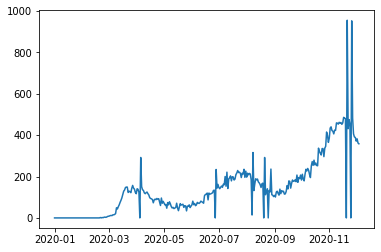

In [11]:
plt.plot(df_ir.dateRep, df_ir.deaths)

# Seaborn: more high level than matplotlib


<AxesSubplot:>

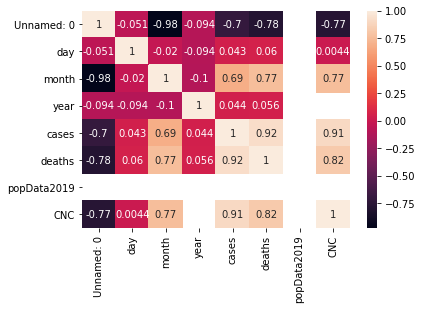

In [13]:
correlation = df_ir.corr()

sns.heatmap(correlation, annot=True)

(0.0, 6000.0)

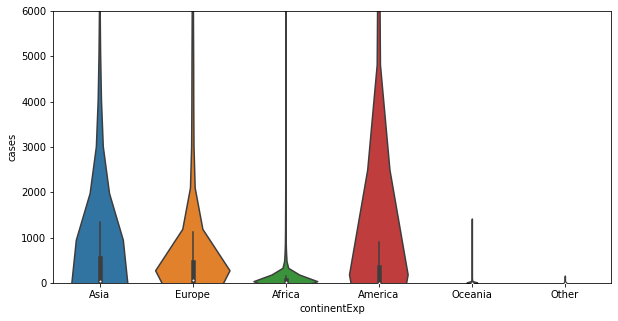

In [18]:
# Violing plot: box plot, pdf data, kernel density estimator, scale: width of each diagram
fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(ax=ax, x=df.continentExp, y=df.cases, scale='count')
plt.ylim(0, 6000)

# plotly: web based turky

In [23]:
df_plot = df.groupby(by=['countriesAndTerritories']).mean().reset_index()
df_plot.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'cum_cov'}, inplace=True)
df_plot.fillna(0, inplace=True)
df_plot.head()

,countriesAndTerritories,day,month,year,cases,deaths,popData2019,cum_cov
0,Afghanistan,15.845455,6.187879,2019.996970,141.930303,5.593939,38041757.0,5.291952
1,Albania,15.918819,7.184502,2020.000000,149.450185,3.143911,2862427.0,68.032201
2,Algeria,15.740299,6.140299,2019.997015,256.498507,7.402985,43053054.0,8.031013
3,Andorra,15.966165,7.263158,2020.000000,25.954887,0.289474,76177.0,469.937369
4,Angola,15.965116,7.395349,2020.000000,59.538760,1.364341,31825299.0,2.665727


In [27]:
fig = px.scatter(df_plot,
                x='cases',
                y='deaths',
                size='popData2019',
                color='cum_cov',
                hover_data=['countriesAndTerritories'])
fig.show()

# Bokeh: much complex, high resolution

In [34]:
fig = figure(x_axis_type='datetime', title='Cases in Iran', plot_height=350, plot_width=800)
fig.xaxis.axis_label = 'Date'
fig.yaxis.axis_label = 'Number of cases'

fig.line(df_ir.dateRep, df_ir.cases)
# corralation between difference plots

show(fig)

# Altair: Interactive, statistics, unable to handle large data (5000), not work for simple **